# Basic Needs Basic Rights Kenya - Tech4MentalHealth

Around 1 in 4 people will experience a mental health problem this year. Low-income countries have an estimated treatment gap of 85% (as compared with high-income countries with a gap of 35% to 50%). While Kenya has a mental illness prevalence rate that is comparable to that of high-income countries, there are still less than 500 healthcare professionals serving the country.

In Kenya, there are growing concerns about mental health among young people, particularly university students that face a challenging and unique conflation of stressors that put them at risk of challenges like depression and substance abuse.

From the use of app-based solutions for screening to electronically delivered therapies, the use of technologies including machine learning and AI will potentially transform the delivery of mental health services in the coming years.

The objective of this challenge is to develop a machine learning model that classifies statements and questions expressed by university students in Kenya when speaking about the mental health challenges they struggle with. The four categories are depression, suicide, alchoholism, and drug abuse.

In [1]:
pwd

'C:\\Users\\Admin\\Desktop\\R projects\\Basic Needs Basic Rights Kenya - Tech4MentalHealth'

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('Train.csv')
data = train.copy()
data.drop('ID', axis=1, inplace=True)
test = pd.read_csv('Test.csv')
sample_sub = pd.read_csv('SampleSubmission.csv')

In [4]:
data.head()

,text,label
0,I feel that it was better I dieAm happy,Depression
1,Why do I get hallucinations?,Drugs
2,I am stresseed due to lack of financial suppor...,Depression
3,Why is life important?,Suicide
4,How could I be helped to go through the depres...,Depression


In [5]:
print(data.isnull().any())

text     False
label    False
dtype: bool


### categorical encoding the label variable

In [6]:
data.dtypes

text     object
label    object
dtype: object

In [7]:
data['label'] = data['label'].astype('category')
print(type(data['label'][0]))

<class 'str'>


In [8]:
data['label_id'] = data['label'].cat.codes
data['label_id'].head()

0    1
1    2
2    1
3    3
4    1
Name: label_id, dtype: int8

In [9]:
data

,text,label,label_id
0,I feel that it was better I dieAm happy,Depression,1
1,Why do I get hallucinations?,Drugs,2
2,I am stresseed due to lack of financial suppor...,Depression,1
3,Why is life important?,Suicide,3
4,How could I be helped to go through the depres...,Depression,1
...,...,...,...
611,What should I do to stop alcoholism?,Alcohol,0
612,How to become my oldself again,Suicide,3
613,How can someone stop it?,Alcohol,0
614,I feel unworthy,Depression,1


In [10]:
test.tail()

,ID,text
304,Z9A6ACLK,Yes
305,ZDUOIGKN,My girlfriend dumped me
306,ZHQ60CCH,How can I go back to being my old self?
307,ZVIJMA4O,Is it true bhang is medicinal?
308,ZYIFAY98,how can I overcome the problem?


In [11]:
data.label.unique()

[Depression, Drugs, Suicide, Alcohol]
Categories (4, object): [Depression, Drugs, Suicide, Alcohol]

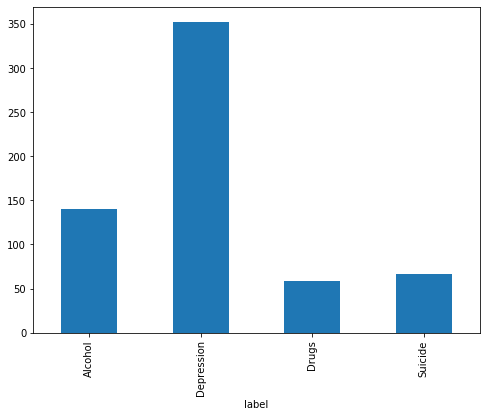

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
#
fig = plt.figure(figsize=(8,6))
data.groupby('label').text.count().plot.bar(ylim=0)
plt.show()

## Text Representation

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfid.fit_transform(data.text).toarray()
target = data.label_id
features.shape

(616, 98)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import random
random.seed(1234)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label_id'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

### Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant

In [16]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [17]:
print(clf.predict(count_vect.transform(["I feel that it was better I dieAm happy"]))) # 1 represents depression

[1]


## Model Selection

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    AdaBoostClassifier(),
    CatBoostClassifier(iterations=300, depth=6, learning_rate=0.1, logging_level='Silent',
                        eval_metric='Accuracy', random_state=42),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(objective='multi:softprob', eval_metric='logloss', learning_rate=0.1, max_depth=4, seed=27,
                  n_estimators=20)
]
#
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, target, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [19]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.680000
1,RandomForestClassifier,1,0.653226
2,RandomForestClassifier,2,0.674797
3,RandomForestClassifier,3,0.639344
4,RandomForestClassifier,4,0.631148
5,LinearSVC,0,0.848000
6,LinearSVC,1,0.862903
7,LinearSVC,2,0.821138
8,LinearSVC,3,0.811475
9,LinearSVC,4,0.819672


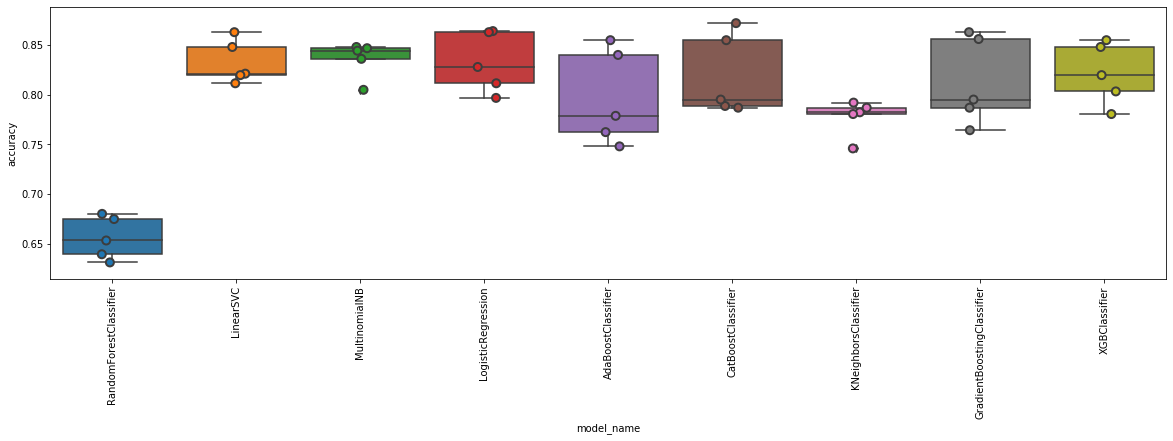

In [20]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [21]:
print(cv_df.groupby('model_name').accuracy.mean())

model_name
AdaBoostClassifier            0.796758
CatBoostClassifier            0.819485
GradientBoostingClassifier    0.813020
KNeighborsClassifier          0.777507
LinearSVC                     0.832638
LogisticRegression            0.832599
MultinomialNB                 0.835996
RandomForestClassifier        0.655703
XGBClassifier                 0.821255
Name: accuracy, dtype: float64


## Model Evaluation

In [22]:
model = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
#
# get the logarithmic loss for the x_test
from sklearn.metrics import log_loss
print(log_loss(y_test, y_prob)) # log los
#
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

0.5693392654702557
[[ 34  11   0   0]
 [  1 114   0   0]
 [  1   5   4   0]
 [  0  14   0   1]]


In [23]:
#catboost
cat = CatBoostClassifier(iterations=300, depth=6, learning_rate=0.1, logging_level='Silent',
                        eval_metric='Accuracy', random_state=42)
cat.fit(X_train, y_train)
cat_prob = cat.predict_proba(X_test)
print(log_loss(y_test, cat_prob))

0.5711954794366941


In [24]:
#xgboost
xgb = XGBClassifier(objective='multi:softprob', eval_metric='logloss', learning_rate=0.1, max_depth=4, seed=27,
                  n_estimators=20)
xgb.fit(X_train, y_train)
xgb_prob = xgb.predict_proba(X_test)
print(log_loss(y_test, xgb_prob))

0.6737812629422626


## Test Data Text Representation

In [25]:
test.drop('ID', axis=1)

,text
0,How to overcome bad feelings and emotions
1,I feel like giving up in life
2,I was so depressed feel like got no strength t...
3,I feel so low especially since I had no one to...
4,can i be successful when I am a drug addict?
...,...
304,Yes
305,My girlfriend dumped me
306,How can I go back to being my old self?
307,Is it true bhang is medicinal?


In [26]:
# clean the test data
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#
corpus = []
for i in range(0, len(test)):
    clean = re.sub('[^a-zA-Z]', ' ', test['text'][i])
    clean = clean.lower().split()
    ps = PorterStemmer()
    # return base words iff they are not english wods
    clean = [ps.stem(word) for word in clean if not word in set(stopwords.words('english'))] 
    clean = ''.join(clean)
    corpus.append(clean)
#    
# tokenize the corpus
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=98)
valid_test = cv.fit_transform(corpus).toarray()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
valid_test.shape

(309, 98)

In [28]:
valid_test = pd.DataFrame(valid_test)

In [29]:
test_pred = model.predict(valid_test)
test_prob = model.predict_proba(valid_test)

In [30]:
names = ['Depression', 'Drugs', 'Suicide', 'Alcohol']

In [31]:
pr = pd.DataFrame(test_prob, columns=names)
pr.head()

,Depression,Drugs,Suicide,Alcohol
0,0.091017,0.694906,0.066255,0.147822
1,0.220418,0.549884,0.111369,0.118329
2,0.220418,0.549884,0.111369,0.118329
3,0.220418,0.549884,0.111369,0.118329
4,0.436282,0.217891,0.226353,0.119474


In [32]:
df = pd.concat([test.ID, pr], axis=1)
df.head()

,ID,Depression,Drugs,Suicide,Alcohol
0,02V56KMO,0.091017,0.694906,0.066255,0.147822
1,03BMGTOK,0.220418,0.549884,0.111369,0.118329
2,03LZVFM6,0.220418,0.549884,0.111369,0.118329
3,0EPULUM5,0.220418,0.549884,0.111369,0.118329
4,0GM4C5GD,0.436282,0.217891,0.226353,0.119474


In [33]:
df.to_csv('Multinormial_Naivebayes.csv', index = False)

In [34]:
###############################################################################################